In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
df = pd.read_csv("data04.csv", index_col=0)
df = df[~df["user"].isin(["licrum", "hosokawa", "koshiro", "stale032", "testtes", "yasu1025yist@gmail.com", "Ralphy_1105", "miminoya"])]


# 実験df確認

In [3]:
df["user"].unique()

array(['yui1_2413', 'kanata0', 'yumebato', 'ayayan1204', 'pe1011',
       'yutapon1967', 'trtrsbt', 'k0717', 'kuritaai1104', 'sdm89',
       'chiyos', '57gvCis.6hd47', 'matsubatask', 'fgjj95fg9', 'Okkus.odd',
       'riramohu', 'mikannkan', 'kintogaga_2023So', 'ranbt2943', 'abcd',
       'chekineko', 'myu-2', 'kohcha', 'toge7188', 'fgf_1212', 'e1w9',
       'yocchi0520', 'nyantakun5', 'ritchie.dw', 'idaha29', 'fumygo',
       'kouhei1992', 'daobenzhimei27@gmail.com', 'cwu19', 'kouji',
       'yaiko2', 'shobota', 'rikerin', 'rag_55', 'psych', 'emina',
       'tenkamt02', 'SYHL24', 'mitubati555', 'ash4949', 'perunsa888',
       'michiko0257', 'kei_0107', 'tokumei135', 'yellowstones', 'izumo',
       'curiosities', 'hayate1144308', 'crowking', 'camui2370',
       'satoh310310', 'psrnsr', 'shati', 'cfhm12', 'ruru0823',
       'tennora@564', 't4ou5d', 'free00612', 'maida0493', 'Qoo',
       'RubyLip', 'citron-maro', 'yusuke_n46', 'hirowing', 'nic',
       'hamham', 'itsumi', 'cw5588', 'come

In [4]:
df["label"].value_counts()

-1    6512
 1    5073
 0     416
Name: label, dtype: int64

# 性別データの連結

In [5]:
l = []
for i in range(4):
    df2 = pd.read_csv(f"zikkendata/{i+1}.csv", index_col=0)
    df2 = df2.rename(columns={"1. あなたの性別を入力してください": "gender", "2. あなたの年齢を入力してください": "old", "4. サイトで登録したアカウントIDを入力してください": "user", "4. サイトで登録した「ユーザー名」を入力してください": "user"})
    l.append(df2)
df2 = pd.concat(l)
df2 = df2[["gender", "old", "user"]].replace('(.*)歳', r'\1', regex=True)
df2["old"]=df2["old"].astype(int)

## データ成型

In [6]:
s1 = set(df["user"].unique()) 
s2 = set(df2["user"].unique())

In [7]:
b1,b2,b3,b4 = list(s1 - s2)

In [8]:
df = df.replace(b1, '3JC9gBJs85z7_wX')
df = df.replace(b2, 'ユウ207')
df = df.replace(b3, '摩天楼さね')
df = df.replace(b4, 'ただのこなつ')

In [9]:
df = pd.merge(df, df2, on='user')

In [10]:
df["gender"].value_counts()

1    7200
2    4801
Name: gender, dtype: int64

# 年齢層の確認

In [11]:
df1 = pd.read_csv("zikkendata/1.csv", index_col=0)
df1 = df1.rename(columns={"1. あなたの性別を入力してください": "gender", "2. あなたの年齢を入力してください": "old", "4. サイトで登録したアカウントIDを入力してください": "user", "4. サイトで登録した「ユーザー名」を入力してください": "user"})

In [12]:
df2 = pd.read_csv("zikkendata/2.csv", index_col=0)
df2 = df2.rename(columns={"1. あなたの性別を入力してください": "gender", "2. あなたの年齢を入力してください": "old", "4. サイトで登録したアカウントIDを入力してください": "user", "4. サイトで登録した「ユーザー名」を入力してください": "user"})

In [13]:
df3 = pd.read_csv("zikkendata/3.csv", index_col=0)
df3 = df3.rename(columns={"1. あなたの性別を入力してください": "gender", "2. あなたの年齢を入力してください": "old", "4. サイトで登録したアカウントIDを入力してください": "user", "4. サイトで登録した「ユーザー名」を入力してください": "user"})

In [14]:
df4 = pd.read_csv("zikkendata/4.csv", index_col=0)
df4 = df4.rename(columns={"1. あなたの性別を入力してください": "gender", "2. あなたの年齢を入力してください": "old", "4. サイトで登録したアカウントIDを入力してください": "user", "4. サイトで登録した「ユーザー名」を入力してください": "user"})

In [15]:
df1 = df1["old"].replace('33歳', '33').astype('int64')
df2 = df2["old"].replace('45歳', '45').astype('int64')
df3 = df3["old"].astype('int64')
df4 = df4["old"].replace('43歳', '43').replace("35歳", "35").astype('int64')

In [16]:
df1 = df1.rename("1")
df2 = df2.rename("2")
df3 = df3.rename("3")
df4 = df4.rename("4")

In [18]:
df = pd.concat([df1, df2, df3, df4], axis=1)

<AxesSubplot: >

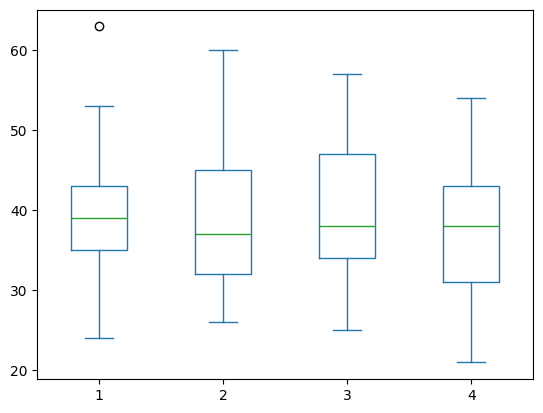

In [20]:
df.plot.box()